<a href="https://colab.research.google.com/github/AmitK0105/AmitK0105/blob/main/TimeSereies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
df=sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [8]:
df["yearmonth"]= pd.to_datetime("01-"+df["month"].astype(str)+"-"+df["year"].astype(str))
#df.head()
df.set_index("yearmonth", inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 3.9 KB


<Axes: xlabel='yearmonth', ylabel='passengers'>

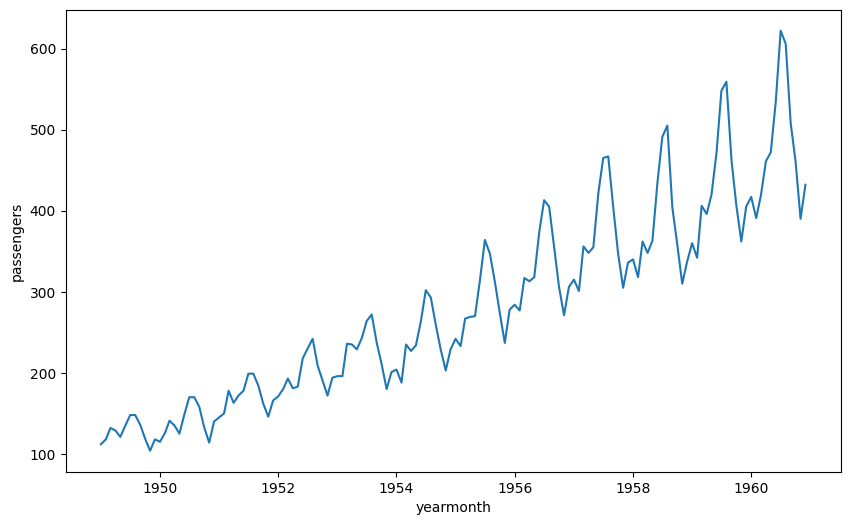

In [9]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x=df.index, y=df.passengers)

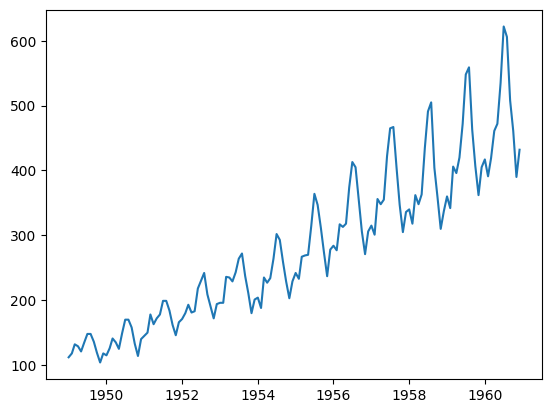

In [10]:
plt.plot(df.index, df.passengers)

In [11]:
#Rolling Statistics
df["rollmean"]=df.passengers.rolling(window=12).mean()
df["rollstd"]= df.passengers.rolling(window=12).std()
df.head()



,year,month,passengers,rollmean,rollstd
yearmonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


<Axes: xlabel='yearmonth', ylabel='passengers'>

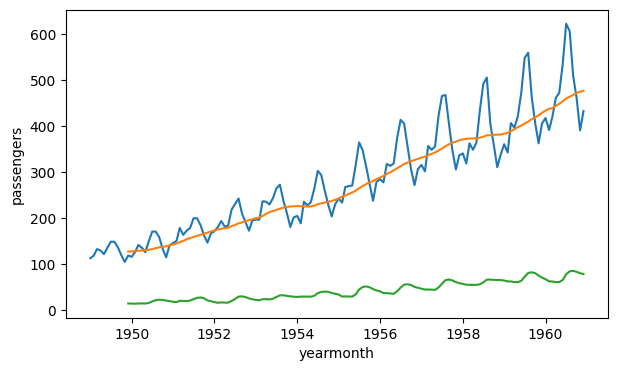

In [12]:
#Plot them again to check the stationarity by using rolling statistics

plt.figure(figsize=(7,4))
sns.lineplot(data=df, x=df.index, y=df.passengers)
sns.lineplot(data=df, x=df.index, y=df.rollmean)
sns.lineplot(data=df, x=df.index, y=df.rollstd)

In [13]:
# Now perform the sencond test(ADF) to check thenstationarity again

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adftest= adfuller(df["passengers"], autolag= "AIC")
adftest

(np.float64(0.8153688792060498),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [16]:
stats=pd.Series(adftest[0:4], index=["stats", "pvalue", "lags", "obser"])
stats

,0
stats,0.815369
pvalue,0.991880
lags,13.000000
obser,130.000000


In [17]:
for key,val in adftest[4].items():
  print("criticallity", key, ":", val)

criticallity 1% : -3.4816817173418295
criticallity 5% : -2.8840418343195267
criticallity 10% : -2.578770059171598


In [18]:
# Making the function to test the stationarity again & again

def test_stationarity(df, var):
  from statsmodels.tsa.stattools import adfuller
  adftest= adfuller(df[var], autolag= "AIC")
  print(adftest)

  stats=pd.Series(adftest[0:4], index=["stats", "pvalue", "lags", "obser"])
  print(stats)
  for key, val in adftest[4].items():
    print("criticality", key, ":", val)

  df["rollmean"]=df.passengers.rolling(window=12).mean()
  df["rollstd"]= df.passengers.rolling(window=12).std()

  plt.figure(figsize=(6,3))
  sns.lineplot(data=df, x=df.index, y=df.var)
  sns.lineplot(data=df, x=df.index, y=df.rollmean)
  sns.lineplot(data=df, x=df.index, y=df.rollstd)

(np.float64(0.8153688792060498), np.float64(0.991880243437641), 13, 130, {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}, np.float64(996.692930839019))
stats       0.815369
pvalue      0.991880
lags       13.000000
obser     130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


TypeError: Invalid object type at position 0

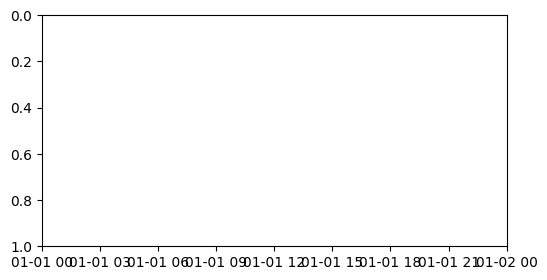

In [19]:
test_stationarity(df,"passengers")

In [23]:
air_df=df[["passengers"]]
air_df

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [24]:
#Time shift

air_df["shift"]= air_df.passengers.shift(1)
air_df["shiftdiff"]= air_df["passengers"]-air_df["shift"]
air_df.head()

/tmp/ipython-input-24-3829817780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df["shift"]= air_df.passengers.shift(1)
/tmp/ipython-input-24-3829817780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df["shiftdiff"]= air_df["passengers"]-air_df["shift"]


,passengers,shift,shiftdiff
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0



ADF Test Results:
ADF Statistic              -2.829267
p-value                     0.054213
Lags Used                  12.000000
Number of Observations    130.000000
dtype: float64
Critical Value 1% : -3.4816817173418295
Critical Value 5% : -2.8840418343195267
Critical Value 10% : -2.578770059171598


/tmp/ipython-input-21-58861909.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rollmean"] = df[var].rolling(window=12).mean()
/tmp/ipython-input-21-58861909.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rollstd"] = df[var].rolling(window=12).std()


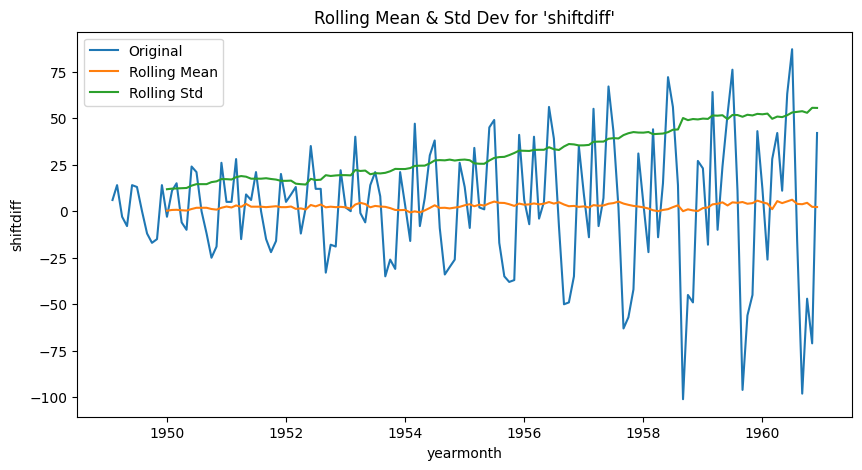

In [25]:
test_stationarity(air_df.dropna(), "shiftdiff")

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, var):
    # 1. Run ADF test
    adftest = adfuller(df[var], autolag="AIC")
    print("\nADF Test Results:")
    stats = pd.Series(adftest[0:4], index=["ADF Statistic", "p-value", "Lags Used", "Number of Observations"])
    print(stats)

    for key, val in adftest[4].items():
        print("Critical Value", key, ":", val)

    # 2. Rolling mean & std for stationarity visualization
    df["rollmean"] = df[var].rolling(window=12).mean()
    df["rollstd"] = df[var].rolling(window=12).std()

    # 3. Plot
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x=df.index, y=var, label="Original")
    sns.lineplot(data=df, x=df.index, y="rollmean", label="Rolling Mean")
    sns.lineplot(data=df, x=df.index, y="rollstd", label="Rolling Std")
    plt.title(f"Rolling Mean & Std Dev for '{var}'")
    plt.show()

In [20]:
log_df=df[["passengers"]]
log_df["log"]= np.log(log_df.passengers, inplace=True)
log_df["logshift"]= log_df["log"].shift(1)
log_df["logshiftdiff"]= log_df["log"]-log_df["logshift"]
log_df.head()

TypeError: log() got an unexpected keyword argument 'inplace'

In [ ]:
test_stationarity(log_df.dropna(), "logshiftdiff")

In [30]:
#Building the model
df.head()
airp= df[["passengers"]].copy(deep=True)
airp["firstdiff"]=airp["passengers"].diff()
airp["Diff12"]= airp["passengers"].diff(12)
airp.head()


,passengers,firstdiff,Diff12
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [55]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

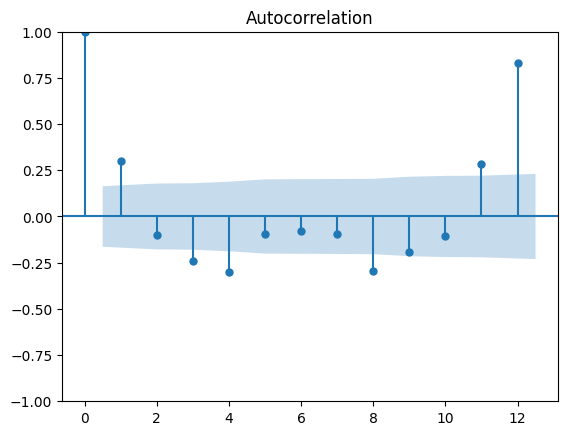

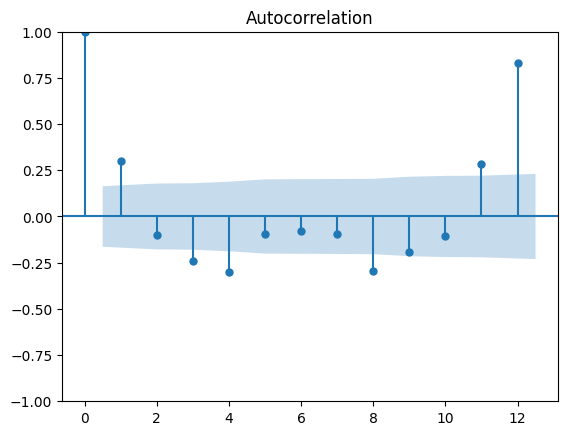

In [51]:
plot_acf(airp["firstdiff"].dropna(),lags=12)

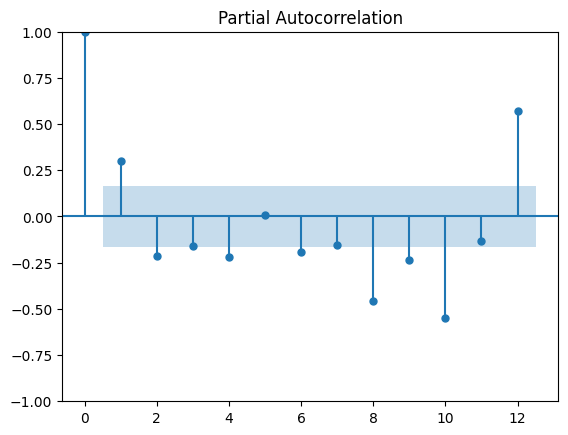

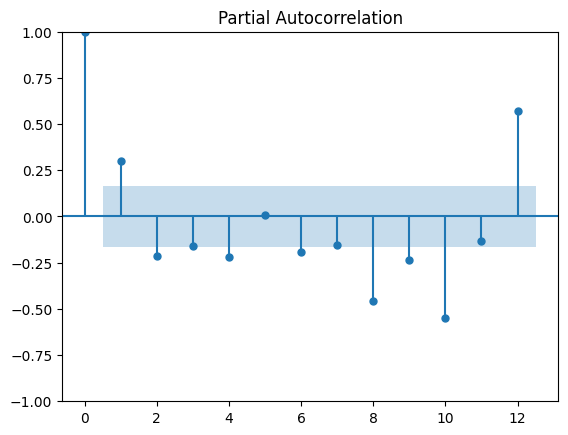

In [38]:
plot_pacf(airp["firstdiff"].dropna(), lags=12)

In [ ]:
# p= 1, q=3, d=1

In [45]:
#Train Test split
Train=airp[:round(len(airp)*70/100)]
Test= airp[round(len(airp)*70/100):]
print(Train, Test)

            passengers  firstdiff  Diff12
yearmonth                                
1949-01-01         112        NaN     NaN
1949-02-01         118        6.0     NaN
1949-03-01         132       14.0     NaN
1949-04-01         129       -3.0     NaN
1949-05-01         121       -8.0     NaN
...                ...        ...     ...
1957-01-01         315        9.0    31.0
1957-02-01         301      -14.0    24.0
1957-03-01         356       55.0    39.0
1957-04-01         348       -8.0    35.0
1957-05-01         355        7.0    37.0

[101 rows x 3 columns]             passengers  firstdiff  Diff12
yearmonth                                
1957-06-01         422       67.0    48.0
1957-07-01         465       43.0    52.0
1957-08-01         467        2.0    62.0
1957-09-01         404      -63.0    49.0
1957-10-01         347      -57.0    41.0
1957-11-01         305      -42.0    34.0
1957-12-01         336       31.0    30.0
1958-01-01         340        4.0    25.0
1958-02-01

In [56]:
model= ARIMA(Train["passengers"],order=(1,1,3))
model_fit= model.fit()
model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             passengers   No. Observations:                  101
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -448.832
Date:                Mon, 14 Jul 2025   AIC                            907.664
Time:                        16:36:23   BIC                            920.689
Sample:                    01-01-1949   HQIC                           912.935
                         - 05-01-1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5525      0.409      1.352      0.176      -0.248       1.353
ma.L1         -0.3398      0.446     -0.761      0.447      -1.215       0.535
ma.L2         -0.4999      0.110     -4.545      0.000      -0.715      -0.284
ma.L3          0.0561      0.244      0.230      0.818      -0.421       0.533
sigma2       460.9165     84.460      5.457      0.000     295.377     626.456
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 3.61
Prob(Q):                              0.58   Prob(JB):                         0.16
Heteroskedasticity (H):               3.92   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""